# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

 Companies rely heavily on user engagement, as longer time spent on their platforms directly translates to higher ad revenue and subscription retention. So identifying the most engaging content is crucial for maximizing user satisfaction and retention, ensuring sustained platform growth.

### **The objective:**

 Build a recommendation system to propose the top 10 songs for a user based on the likelihood of listening to those songs.


### **The key questions:**

- How to recommend songs to new users that likely to be interacted with.   
- How to recommend songs to current users using their past listened tracks.

### **The problem formulation**:


To make recommendation system that makes users spend as less time as possible to find tracks they look for and to show them more tracks they most likely willing to listen so expand their presence and interactions with the platform listening to more music they aren't looking for but they like when they are recommended to them. So customers will visit the platform more frequent which increases its reputation and revenue.

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**

- song_id - A unique id given to every song
- title - Title of the song
- Release - Name of the released album
- Artist_name - Name of the artist
- year - Year of release

**count_data**

- user _id - A unique id given to the user
- song_id - A unique id given to the song
- play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [1]:
!pip uninstall numpy -y
!pip install numpy==1.26.0

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 86.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.0 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.0 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.0 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.0 which is incompatible.


**Note : ** After running the above cell, a pop-up will appear prompting you to restart the session. Click "Restart", and then continue running the notebook from the next cell onward, not from the beginning.

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

In [1]:
# Used to ignore the warning given as output of the code
from warnings import filterwarnings
filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd


# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt

# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Impoort mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [2]:
# Importing the datasets
count_df = pd.read_csv('/content/count_data.csv')
song_df = pd.read_csv('/content/song_data.csv')

### **Understanding the data by viewing a few observations**

In [3]:
# Display first 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [4]:
# Display first 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [5]:
# Display info of count_df
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [6]:
count_df.shape

(2000000, 4)

In [7]:
count_df.isnull().sum()

,0
Unnamed: 0,0
user_id,0
song_id,0
play_count,0


In [8]:
# Display info of song_df
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [9]:
song_df.shape

(1000000, 5)

In [10]:
song_df.isnull().sum()

,0
song_id,0
title,17
release,7
artist_name,0
year,0


#### **Observations and Insights:**
* count_df has **2,000,000** rows and **4** columns without missing values.   
* Its datatypes are : Unnamed (int64) , user_id (object) , song_id (object) and play_count (int64).   
* song_df has **1,000,000** rows and **5** columns with **17** missing values in song titles column and **7** released albums column.   
* Its datatypes are : song_id (object) , title (object) , release (object), artist_name (object) and year (int64).

In [5]:
# Left merge count_df and song_df on "song_id". Drop duplicates from song_df data simultaneously
df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on='song_id', how='left')

# Drop the column 'Unnamed: 0'
df.drop('Unnamed: 0', axis=1, inplace=True)

## Name the obtained dataframe as "df"
df

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [6]:
# Apply label encoding for "user_id" and "song_id"
df['user_id'] = df['user_id'].astype('category').cat.codes
df['song_id'] = df['song_id'].astype('category').cat.codes

In [7]:
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [8]:
# Get the column containing the users
users = df.user_id

# Create a dictionary that maps users(listeners) to the number of songs that they have listened to
playing_count = dict()

for user in users:
    # If we already have the user, just add 1 to their playing count
    if user in playing_count:
        playing_count[user] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[user] = 1

In [9]:
# We want our users to have listened at least 90 songs
SONG_COUNT_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_songs in playing_count.items():

    if num_songs < SONG_COUNT_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [10]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary that maps songs to its number of users(listeners)
playing_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their playing count
    if song in playing_count:
        playing_count[song] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[song] = 1

In [11]:
# We want our song to be listened by atleast 120 users to be considred
LISTENER_COUNT_CUTOFF = 120

remove_songs = []

for song, num_users in playing_count.items():
    if num_users < LISTENER_COUNT_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

Out of all the songs available, songs with play_count less than or equal to 5 are in almost 90% abundance. So for building the recommendation system let us consider only those songs.

In [12]:
# Keep only records of songs with play_count less than or equal to (<=) 5
df_final = df_final[df_final.play_count<=5]

In [13]:
# Check the shape of the data
df_final.shape

(117876, 7)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [20]:
# Display total number of unique user_id
df_final.user_id.nunique()

3155

Total number of unique song id

In [21]:
# Display total number of unique song_id
df_final.song_id.nunique()

563

Total number of unique artists

In [22]:
# Display total number of unique artists
df_final.artist_name.nunique()

232

#### **Observations and Insights:**   
* user_id and song_id data are reshaped to much easier numeric features.   
* After cutting off the dataset to include only users who listened to at least **90** songs and songs to be at least were played **120** times , the dataframe shrinked to have only **117,876** raws instead of **2,000,000**.   
* Now the new dataframe **df_final** includes **3155** users listened to **563** songs for **232** artists.   


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [23]:
df_final.groupby('song_id')['play_count'].count().sort_values(ascending=False).head(10)

,play_count
song_id,
8582,751
352,748
2220,713
1118,662
4152,652
5531,618
4448,609
6189,606
6293,583


Most interacted users

In [24]:
df_final.groupby('user_id')['play_count'].count().sort_values(ascending=False).head(10)

,play_count
user_id,
61472,243
15733,227
37049,202
9570,184
23337,177
10763,176
9097,175
26616,175
43041,174


#### **Observations and Insights:**   
* The most played song is **8582** with **751** playing times.   
* The most interacted user is **61472** who listened to **243** songs.


Songs released on yearly basis

In [25]:
# Find out the number of songs released in a year, use the songs_df
  # Hint: Use groupby function on the 'year' column
songs_played_per_year = song_df.groupby('year')['song_id'].count()
songs_played_per_year

,song_id
year,
0,484424
1922,6
1924,5
1925,7
1926,19
...,...
2007,39414
2008,34770
2009,31051


In [26]:
# Drop the 0 year raw as it doesn't represent a real year
#songs_played_per_year = song_df.groupby('year')['song_id'].count().drop(0)
#songs_played_per_year

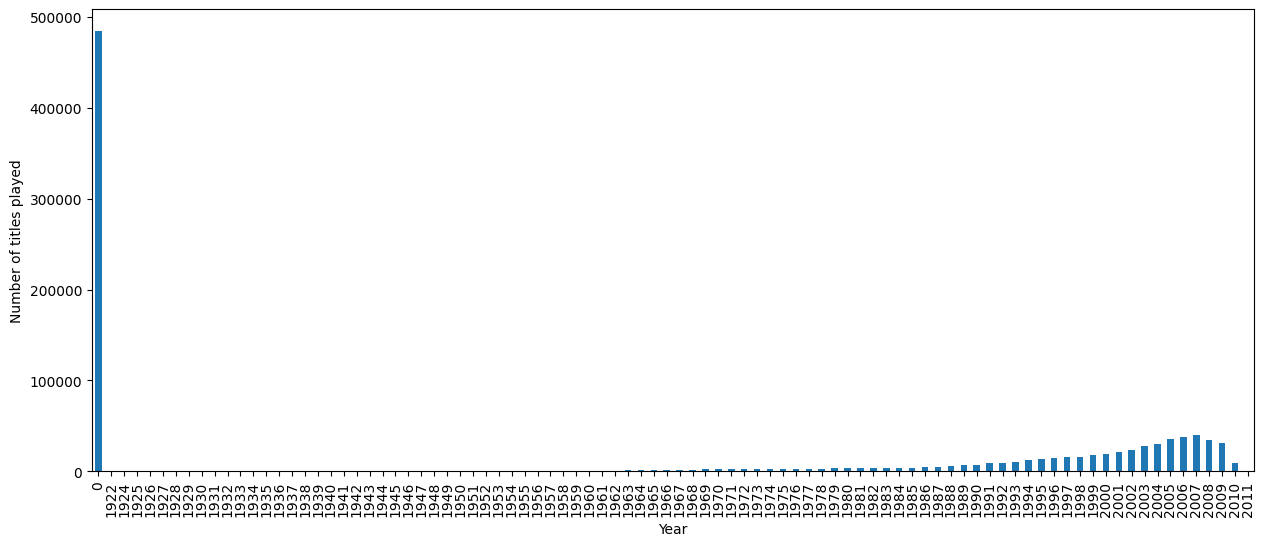

In [27]:
# Create a barplot plot with y label as "number of titles played" and x -axis year

# Set the figure size
plt.figure(figsize=(15,6))

# Create a barplot plot
songs_played_per_year.plot(kind='bar')

# Set the x label of the plot
plt.xlabel('Year')

# Set the y label of the plot
plt.ylabel('Number of titles played')

# Rotate the x labels 90 degrees to be more clear
plt.xticks(rotation=90)

# Show the plot
plt.show()

#### **Observations and Insights:** #
* Majority of songs are in year **0** which mostly means the actual release year is unknown so they are counted as **0** year.   
* Although they affect the data ploting but can't be ignored as those songs could be popular and listened enough to be recommended.

**Think About It:** What other insights can be drawn using exploratory data analysis?


artist_name
Coldplay                  8243
The Killers               5809
The Black Keys            5765
Kings Of Leon             4623
Jack Johnson              4588
Daft Punk                 4255
Radiohead                 4159
Florence + The Machine    3814
Muse                      3572
The New Pornographers     3390
Name: play_count, dtype: int64


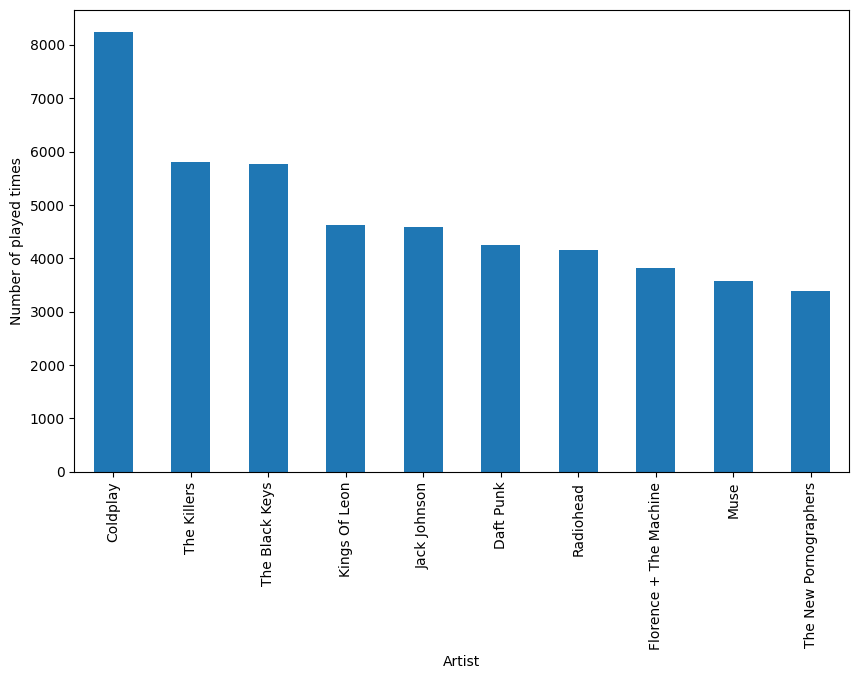

In [28]:
# The most popular artists by counting the number of playing times
most_played_artist = df.groupby('artist_name')['play_count'].count().sort_values(ascending=False).head(10)
print(most_played_artist)

# Create a barplot plot
plt.figure(figsize=(10,6))
most_played_artist.plot(kind='bar')
plt.xlabel('Artist')
plt.ylabel('Number of played times')
plt.show()


release
Greatest Hits                       2858
My Worlds                           2410
Vampire Weekend                     2014
Lungs                               1997
Ray Guns Are Not Just The Future    1889
Hell Train                          1740
A Rush Of Blood To The Head         1709
Give Up                             1695
Waking Up                           1517
The Fame Monster                    1510
Name: play_count, dtype: int64


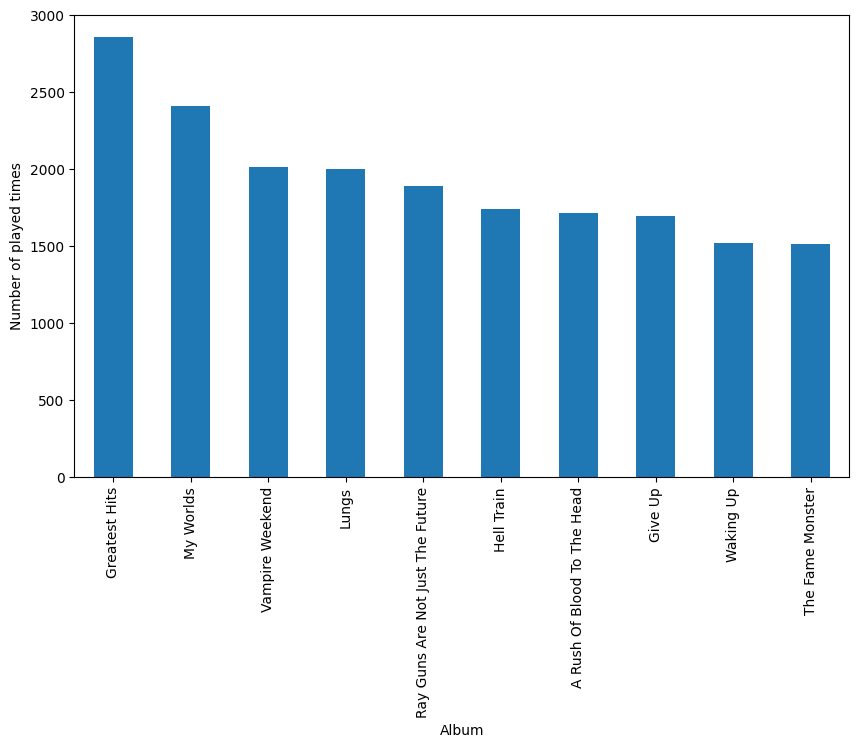

In [29]:
# The most favorable album by counting the number of playing times
most_played_album = df.groupby('release')['play_count'].count().sort_values(ascending=False).head(10)
print(most_played_album)

# Create a barplot plot
plt.figure(figsize=(10,6))
most_played_album.plot(kind='bar')
plt.xlabel('Album')
plt.ylabel('Number of played times')
plt.show()

In [30]:
# Can find the most played song in certain year with how many played times
  # For example year 1980

target_year = 1980

# Filter data for the target year and count plays per song
popular_songs_in_year = (
    song_df[song_df['year'] == target_year]  # Filter by year
    .groupby('title')['song_id']         # Group by song name
    .count()                                # Count plays per song
    .reset_index(name='play_count')          # Convert to DataFrame
    .sort_values('play_count', ascending=False)  # Sort by play count (descending)
)

# Get the top song (highest play count)
most_popular_song = popular_songs_in_year.iloc[0]
print(f"Most popular song in {target_year}: {most_popular_song['title']} (Plays: {most_popular_song['play_count']})")

Most popular song in 1980: Fade To Grey (Plays: 9)


Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [31]:
# Calculating average play_count
       # Hint: Use groupby function on the song_id column
average_count = df_final.groupby('song_id')['play_count'].mean()

# Calculating the frequency a song is played
      # Hint: Use groupby function on the song_id column

play_freq = df_final.groupby('song_id')['play_count'].count()

In [32]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({
    'average_count' : average_count,
    'play_freq' : play_freq
})
final_play

# Let us see the first five records of the final_play dataset
final_play.head(5)

,average_count,play_freq
song_id,,
21,1.622642,265
22,1.492424,132
52,1.729216,421
62,1.728070,114
93,1.452174,115


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [33]:
# Build the function to find top n songs
def top_n_songs(data, n, min_count):
  recommendations = data[data['play_freq'] >= min_count].sort_values(by='average_count', ascending=False).head(n)
  return recommendations


In [34]:
# Recommend top 10 songs using the function defined above
top_n_songs(final_play, 10, 100)

,average_count,play_freq
song_id,,
7224,3.373832,107
6450,2.578431,102
9942,2.486667,150
5531,2.309061,618
5653,2.296296,108
8483,2.235772,123
2220,2.220196,713
657,2.218543,151
614,2.217158,373


In [35]:
# Top songs titles also can be shown using the below list

top_songs_with_titles = top_n_songs(final_play, 10, 100)
list_of_songs = []
for i in top_songs_with_titles.index:  # Iterate through the index (song_ids) of the result DataFrame
  list_of_songs.append(df_final[df_final['song_id']==i]['title'].unique()[0])
print('Top songs titles are :' )
list_of_songs

Top songs titles are :


['Victoria (LP Version)',
 'Brave The Elements',
 'Greece 2000',
 'Secrets',
 'Transparency',
 'Video Killed The Radio Star',
 'Sehr kosmisch',
 'Luvstruck',
 "You're The One",
 'Dog Days Are Over (Radio Edit)']

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [36]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 11.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2469541 sha256=d24ea4aa8f14aa4b60e9cbee20853ba0048498c62d3bc20785958e2fafd01438
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [37]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy


# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader


# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [38]:
def precision_recall_at_k(model, k=30, threshold=1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    #Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, playing_count in user_est_true.items():

        # Sort play count by estimated value
        playing_count.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in playing_count)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in playing_count[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in playing_count[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)

    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

Below we are loading the **dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`** which is required by this library. To do this we will be **using the classes `Reader` and `Dataset`**

You will also notice here that we read the dataset by providing a scale of ratings. However, as you would know, we do not have ratings data of the songs. In this case, we are going to use play_count as a proxy for ratings with the assumption that the more the user listens to a song, the higher the chance that they like the song

In [39]:
# Instantiating Reader scale with expected rating scale
 #use rating scale (0, 5)
reader = Reader(rating_scale=(0,5))

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42

trainset, testset = train_test_split(data, test_size=0.4, random_state=42)

In [40]:
len(testset)

47151

**Think About It:** How changing the test size would change the results and outputs?

In [41]:
# Build the default user-user-similarity model
sim_user_user = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
 # Use random_state = 1
user_user_base_model = KNNBasic(sim_options=sim_user_user, random_state=1)

# Train the algorithm on the trainset, and predict play_count for the testset
user_user_base_model.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(user_user_base_model, 30, 1.5)


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights:**   
* The RMSE to check how far the overall predictions are from the actual values and it is **1.0878**.   
* The recall is ~**0.692**, which means out of all the relevant songs **69%** are recommended.   
* The precision is ~ **0.396**, which means out of all the recommended songs **40%** are relevant.   
* The F_1 score of the baseline model is ~**0.504** which means that only half recommended songs were relevant and relevant songs were recommended.

In [42]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [43]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id
user_user_base_model.predict(6958, 447)

Prediction(uid=6958, iid=447, r_ui=None, est=1.1222839992769744, details={'actual_k': 40, 'was_impossible': False})

In [44]:
# Predicting play_count for a sample user with a song not-listened by the user
 #predict play_count for any sample user
def n_users_not_listen_to(n, data, song_id):
    users_listen_to = set(data[data['song_id'] == song_id]['user_id'])
    all_users = set(data['user_id'])
    return list(all_users.difference(users_listen_to))[:n] # where n is the number of elements to get in the list

In [45]:
n_users_not_listen_to(5, df_final, 447)

[8194, 49157, 32773, 8199, 40969]

In [46]:
user_user_base_model.predict(8194, 447)

Prediction(uid=8194, iid=447, r_ui=None, est=1.3267473545779291, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**   
The model predicted play count of more than **1** which is good , which means it is likely for the user to listen to the song if it is recommended.

Now, let's try to tune the model and see if we can improve the model performance.

In [47]:
# Setting up parameter grid to tune the hyperparameters
parameter_grid ={
    'k': [30 , 40],
    'min_k': [6 ,7 , 8],
    'sim_options': {'name': ['msd', 'cosine'],
    'user_based': [True]}
}
# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, parameter_grid, measures=['rmse'], cv=3 , n_jobs = -1)

# Fitting the data
 # Use entire data for GridSearch
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.058825963540861
{'k': 40, 'min_k': 7, 'sim_options': {'name': 'msd', 'user_based': True}}


In [48]:
# Train the best model found in above gridsearch
sim_user_user = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
 # Use random_state = 1
user_user_optimized = KNNBasic(sim_options=sim_user_user,k = 40, min_k = 8, random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset
user_user_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(user_user_optimized, 30, 1.5)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0873
Precision:  0.396
Recall:  0.695
F_1 score:  0.505


**Observations and Insights:**
RMSE has a very slim reduction and the F_1 score has also a tiny increment.
So after tuning hyperparameters , the model performance is almost the same as baseline.

In [49]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
user_user_optimized.predict(6958, 1671, r_ui=2)

Prediction(uid=6958, iid=1671, r_ui=2, est=1.8009387435128914, details={'actual_k': 40, 'was_impossible': False})

In [50]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
def n_songs_not_listened(n, data, user_id):
    songs_listened = set(data[data['user_id'] == user_id]['song_id'])
    all_users = set(data['song_id'])
    return list(all_users.difference(songs_listened))[:n] # where n is the number of elements to get in the list

In [51]:
n_songs_not_listened(5, df_final, 6958)

[2048, 6148, 21, 22, 6175]

In [52]:
user_user_optimized.predict(6958, 6175)

Prediction(uid=6958, iid=6175, r_ui=None, est=1.725, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**   
The model predicts that if the nonlistened songs are recommended to users , they will more likely be played as the prediction play counts are almost **2** times.

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [53]:
# Use inner id 0
user_user_optimized.get_neighbors(0, 5)


[3, 6, 11, 16, 28]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [54]:
def get_recommendations(data, user_id, top_n, algo):
  # Creating an empty list to store the recommended song ids
  rec_songs = []

  # Creating an user item interactions matrix
  user_song_interactin_matrix = data.pivot(index='user_id', columns='song_id', values='play_count')

  # Extracting those song ids which the user_id has not played yet
  not_played_songs = user_song_interactin_matrix.loc[user_id][user_song_interactin_matrix.loc[user_id].isnull()].index.tolist()

  # Looping through each of the song ids which user_id has not interacted yet
  for song_id in not_played_songs:

    # Predicting the users for those non played song ids by this user
    est = algo.predict(user_id, song_id).est

    # Appending the predicted play_counts
    rec_songs.append((song_id, est))

    # Sorting the predicted play_counts in descending order
  rec_songs.sort(key=lambda x: x[1], reverse=True)

  # Returing top n highest predicted play_count songs for this user
  return rec_songs[:top_n]

In [55]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
rec_songs = get_recommendations(df_final, 40969, 5, user_user_optimized)
rec_songs

[(7224, 3.2430304569986985),
 (8324, 2.559990659355976),
 (5645, 2.55),
 (614, 2.525),
 (657, 2.3265291725450328)]

In [56]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
recommended_df = pd.DataFrame(rec_songs, columns=['song_id', 'predicted_play_count'])
recommended_df

,song_id,predicted_play_count
0,7224,3.243030
1,8324,2.559991
2,5645,2.550000
3,614,2.525000
4,657,2.326529


**Observations and Insights:**   
The model predictions are pretty good for the recommended songs as each song is predicted to be played more than **2** times.

### Correcting the play_counts and Ranking the above songs

In [57]:
final_play.head()

,average_count,play_freq
song_id,,
21,1.622642,265
22,1.492424,132
52,1.729216,421
62,1.728070,114
93,1.452174,115


In [58]:
def ranking_songs(recommendations, playing_count):

  # Sort the songs based on play counts
  recommended_df_sorted = recommendations.sort_values(by='predicted_play_count', ascending=False)

  # Merge with the recommended songs to get predicted play_counts
  ranked_songs = recommended_df_sorted.merge(playing_count, on='song_id')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_play_count'] = ranked_songs['play_freq'] - 1/np.sqrt(ranked_songs['predicted_play_count'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending=False)

  return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [59]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommended_df, final_play)

,song_id,predicted_play_count,average_count,play_freq,corrected_play_count
3,614,2.525000,2.217158,373,372.370683
2,5645,2.550000,1.986667,300,299.373776
4,657,2.326529,2.218543,151,150.344390
0,7224,3.243030,3.373832,107,106.444704
1,8324,2.559991,2.625000,96,95.374999


**Observations and Insights:______________**

### Item Item Similarity-based collaborative filtering recommendation systems

In [60]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
sim_item_item = {'name': 'cosine',
               'user_based': False}
item_item_base_model = KNNBasic(sim_options=sim_item_item, random_state=1)
item_item_base_model.fit(trainset)
precision_recall_at_k(item_item_base_model, 30, 1.5)


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


**Observations and Insights:**   
* The RMSE to check how far the overall predictions are from the actual values and it is **1.0394**.   
* The recall is ~**0.562**, which means out of all the relevant songs **56%** are recommended.   
* The precision is ~ **0.307**, which means out of all the recommended songs **30%** are relevant.   
* The F_1 score of the baseline model is ~**0.397** which means that only half recommended songs were relevant and relevant songs were recommended.

In [61]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) listened to by the user
item_item_base_model.predict(6958, 1671)

Prediction(uid=6958, iid=1671, r_ui=None, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [62]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
item_item_base_model.predict(8199, 1671)

Prediction(uid=8199, iid=1671, r_ui=None, est=1.329613621284604, details={'actual_k': 28, 'was_impossible': False})

**Observations and Insights:**   
Model predicts that the song will be likely listened to new users.

In [63]:
# Apply grid search for enhancing model performance


# Setting up parameter grid to tune the hyperparameters
parameter_grid ={
    'k': [30 , 40],
    'min_k': [6 ,7 , 8],
    'sim_options': {'name': ['msd', 'cosine'],
    'user_based': [False]}
}


# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, parameter_grid, measures=['rmse'], cv=3 , n_jobs = -1)

# Fitting the data
gs.fit(data)


# Find the best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0330926021527038
{'k': 40, 'min_k': 6, 'sim_options': {'name': 'cosine', 'user_based': False}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [64]:
# Apply the best model found in the grid search
sim_item_item = {'name': 'cosine',
               'user_based': False}
item_item_optimized = KNNBasic(sim_options=sim_item_item,k = 40, min_k = 6, random_state = 1)
item_item_optimized.fit(trainset)
precision_recall_at_k(item_item_optimized, 30, 1.5)


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0391
Precision:  0.32
Recall:  0.588
F_1 score:  0.414


**Observations and Insights:**   
**RMSE** is reduced and the **F_1 score** has increased.   
So after tuning hyperparameters , the model performance has improved.

In [65]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
item_item_optimized.predict(6958, 1671)


Prediction(uid=6958, iid=1671, r_ui=None, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [66]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not listened to by the user
item_item_optimized.predict(6958, 3232)


Prediction(uid=6958, iid=3232, r_ui=None, est=1.377602711737415, details={'actual_k': 20, 'was_impossible': False})

**Observations and Insights:**   
The prediction done by the tuned model is the same of the prediction by the baseline model.

In [67]:
# Find five most similar items to the item with inner id 0
item_item_optimized.get_neighbors(0, 5)

[3, 10, 11, 24, 30]

In [68]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
rec_songs = get_recommendations(df_final, 10763, 5, item_item_optimized)
rec_songs


[(5531, 1.8215465384132423),
 (352, 1.8181127379256221),
 (7791, 1.7581348933365641),
 (961, 1.725),
 (2914, 1.7)]

In [69]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
recommended_df = pd.DataFrame(rec_songs, columns=['song_id', 'predicted_play_count'])
recommended_df


,song_id,predicted_play_count
0,5531,1.821547
1,352,1.818113
2,7791,1.758135
3,961,1.725000
4,2914,1.700000


In [70]:
# Applying the ranking_songs function
ranking_songs(recommended_df, final_play)


,song_id,predicted_play_count,average_count,play_freq,corrected_play_count
1,352,1.818113,2.184492,748,747.258366
0,5531,1.821547,2.309061,618,617.259065
2,7791,1.758135,1.989899,495,494.245822
3,961,1.725000,1.361290,155,154.238613
4,2914,1.700000,1.672414,116,115.233035


**Observations and Insights:**   
The model predictions are fluctuating between songs , some of songs predictions are higher than the actual average play count and some are less.   
But generally , the model predictions are pretty good for the recommended songs.

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [99]:
# Build baseline model using svd
svd = SVD(random_state=1)

# Train the algorithm on the trainset, and predict play_count for the testset
svd.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(svd, 30, 1.5)


RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


In [100]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui=2)


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [101]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(6958, 3232)


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5561675084403663, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [102]:
# Set the parameter space to tune
parameter_grid = {'n_epochs': [20, 30 , 40 , 50],
                  'lr_all': [0.005, 0.010 , 0.020 , 0.030],
                  'reg_all': [0.2 , 0.4, 0.6 , 0.8]}


# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, parameter_grid, measures=['rmse'], cv=3 , n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0042330226093361
{'n_epochs': 50, 'lr_all': 0.02, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [109]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs=50, lr_all=0.02, reg_all=0.2)
svd_optimized.fit(trainset)
precision_recall_at_k(svd_optimized, 30, 1.5)


RMSE: 1.0075
Precision:  0.414
Recall:  0.624
F_1 score:  0.498


**Observations and Insights:**   
**RMSE** is reduced and the **F_1 score** is the same as base model.   
So after tuning hyperparameters , the model performance has slightly improved.

In [110]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(6958, 1671)


Prediction(uid=6958, iid=1671, r_ui=None, est=1.4698786783413926, details={'was_impossible': False})

In [111]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
svd_optimized.predict(6958, 3232)


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4534140386449435, details={'was_impossible': False})

**Observations and Insights:_________**

In [112]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
rec_songs = get_recommendations(df_final, 6958, 5, svd_optimized)
rec_songs


[(7224, 2.4307043389370935),
 (5653, 2.0852597823227734),
 (6450, 2.074746842224037),
 (9942, 2.0525217082453984),
 (4831, 2.0402123711240794)]

In [113]:
# Ranking songs based on above recommendations
ranking_songs(recommended_df, final_play)

,song_id,predicted_play_count,average_count,play_freq,corrected_play_count
1,352,1.818113,2.184492,748,747.258366
0,5531,1.821547,2.309061,618,617.259065
2,7791,1.758135,1.989899,495,494.245822
3,961,1.725000,1.361290,155,154.238613
4,2914,1.700000,1.672414,116,115.233035


**Observations and Insights:_________**

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [114]:
# Make baseline clustering model
co_clustering = CoClustering()

# Train the algorithm on the trainset, and predict play_count for the testset
co_clustering.fit(trainset)

precision_recall_at_k(co_clustering, 30, 1.5)


RMSE: 1.0547
Precision:  0.387
Recall:  0.573
F_1 score:  0.462


In [115]:
# Making prediction for user_id 6958 and song_id 1671
co_clustering.predict(6958, 1671)


Prediction(uid=6958, iid=1671, r_ui=None, est=0.9633890238927014, details={'was_impossible': False})

In [116]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not listened to by the user
co_clustering.predict(6958, 3232)


Prediction(uid=6958, iid=3232, r_ui=None, est=1.1477324582361361, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [118]:
# Set the parameter space to tune
parameter_grid = {
    'n_cltr_u': [2, 3, 4, 5],
    'n_cltr_i': [2, 3, 4, 5],
}


# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, parameter_grid, measures=['rmse'], cv=3 , n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.035412869396574
{'n_cltr_u': 2, 'n_cltr_i': 4}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [119]:
# Train the tuned Coclustering algorithm
co_clustering_optimized = CoClustering(n_cltr_u=2, n_cltr_i=4)
co_clustering_optimized.fit(trainset)
precision_recall_at_k(co_clustering_optimized, 30, 1.5)


RMSE: 1.0434
Precision:  0.399
Recall:  0.586
F_1 score:  0.475


**Observations and Insights:_________**

In [120]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
co_clustering_optimized.predict(6958, 1671)


Prediction(uid=6958, iid=1671, r_ui=None, est=0.8087833171066718, details={'was_impossible': False})

In [121]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
co_clustering_optimized.predict(6958, 3232)


Prediction(uid=6958, iid=3232, r_ui=None, est=1.3984579196040532, details={'was_impossible': False})

**Observations and Insights:_________**

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [122]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
rec_songs = get_recommendations(df_final, 6958, 5, co_clustering_optimized)
rec_songs


[(7224, 2.6093981611997767),
 (5653, 2.4909988116035535),
 (5531, 2.3283850812478875),
 (4831, 2.3276047022066386),
 (614, 2.3214220137343613)]

### Correcting the play_count and Ranking the above songs

In [123]:
# Ranking songs based on the above recommendations
ranking_songs(recommended_df, final_play)


,song_id,predicted_play_count,average_count,play_freq,corrected_play_count
1,352,1.818113,2.184492,748,747.258366
0,5531,1.821547,2.309061,618,617.259065
2,7791,1.758135,1.989899,495,494.245822
3,961,1.725000,1.361290,155,154.238613
4,2914,1.700000,1.672414,116,115.233035


**Observations and Insights:_________**

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [22]:
df_small = df_final.copy()
df_small.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [25]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text'] = df_small['title'] + ' ' + df_small['release'] + ' ' + df_small['artist_name']


In [26]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop the duplicates from the title column
df_small.drop_duplicates(subset=['title'], inplace=True)

# Set the title column as the index
df_small.set_index('title', inplace=True)

# See the first 5 records of the df_small dataset
df_small.head()


,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [27]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)


In [28]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download('punkt')


# Download stopwords library
nltk.download('stopwords')


# Download wordnet
nltk.download('wordnet')


# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords


# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [29]:
# Create a function to tokenize the text
def tokenize(text):

    # Remove punctuations
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)

In [30]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(analyzer='word', stop_words='english')

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
tfidf_matrix = tfidf.fit_transform(df_small['text']).toarray()


In [31]:
# Compute the cosine similarity for the tfidf above output
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)


 Finally, let's create a function to find most similar songs to recommend for a given song.

In [32]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):


    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1:11].index)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])

    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [33]:
# Make the recommendation for the song with title 'Learn To Fly'
recommended_songs = []
recommendations('Learn To Fly', cosine_sim)


['Everlong',
 'The Pretender',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Happy Endings',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Who Let You Go?']

**Observations and Insights:_________**

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?